# Projekt 1 - Feature engineering + EDA

## Nikola Szczurek, numer indeksu: 408103

Zadanie 1.
Zapoznanie z biblioteką SEABORN.

> Seaborn to biblioteka do wizualizacji danych w języku Python oparta na matplotlib. Zapewnia interfejs wysokiego poziomu do rysowania atrakcyjnej i bogatej w informacje grafiki statystycznej.

Zadanie 2.
Zapoznanie ze stroną https://dane.gov.pl/. Jak udostępniane są
tam dane, jakie dane można pobrać i w jaki sposób można je użyć. Czy
jest jeden rodzaj API? Czy jest możliwość szybkiego sprawdzenia jakości
danych?

> Dane na platformie dane.gov.pl są danymi otwartymi udostępnianymi przez różne instytucje. Oznacza to, że są to dane dostępne bezpłatnie dla każdego. Dane na dane.gov.pl udostępniane są w różnych formatach, takich jak CSV, JSON, XML. 
Znaleziony zestaw danych można pobrać lub wykorzystać za pomocą odpowiednich narzędzi programistycznych, w zależności od formatu danych i potrzeb.
Na stronie dane.gov.pl dostępne są różne rodzaje API, w zależności od konkretnego zbioru danych, najczęściej używanym rodzajem API jest REST API oraz SOAP API.
Dostępne są także różne narzędzia filtrujące pozwalające na łatwe przeglądanie, wyszukiwanie i pobieranie danych.

Zadanie 3.
Wybór zestawu danych dostępnych na stronie wymienionej w punkcie 2. 

> Do dalszych analiz wybrano jeden z zestawów przykładowych dotyczący testów dźwignicy. Są to dane z testów modernizowanego układu zasilania elektrycznego w dźwignicy żurawia zastosowanego jako alternatywy dla silnika Diesla w kontekście parametrów dźwignicy, kosztów zużycia energii elektrycznej i paliw, podczas transportu pionowego ładunków w różnych warunkach pogodowych.

Zadanie 4.
Wykonanie pierwszego etap pipeline’u ML. 

In [1]:
# Import bibliotek niezbędnych do realizacji zadań
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


1.   Pobranie danych i zapoznanie się z ich opisem.

In [17]:
dane = pd.read_csv("dane_z_badan_dzwignicy.csv")
dane.head(20)

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
0,1,11/4/2019,5,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.00
1,2,11/4/2019,8,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.00
2,3,11/4/2019,15,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.00
3,4,11/5/2019,5,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.50
4,5,11/5/2019,8,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.50
5,6,11/5/2019,15,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.50
6,7,11/6/2019,5,17.7,3,9,15.1,48.0,4244.0,NaN,NaN,NaN,203.7120,13.66,3.79,6.75,1004.25
7,8,11/6/2019,8,17.7,3,9,15.1,48.0,4244.0,NaN,NaN,NaN,203.7120,13.66,3.79,6.75,1004.25
8,9,11/6/2019,15,17.7,3,9,15.1,48.0,4244.0,NaN,NaN,NaN,203.7120,13.66,3.79,6.75,1004.25
9,10,11/7/2019,5,17.7,8,11,15.2,48.8,4245.0,NaN,NaN,NaN,207.1560,6.50,1.81,6.00,1008.50


2. Do czego mogą zostać użyte pobrane dane?

> Dane mogą zostać użyte jako podstawa do wyboru typu zasilania dźwignicy żurawia- elektrycznego lub silnika Diesla, w zależności od kosztów jakie generuje zużycie energii elektycznej i paliw w trakcie transportu pionowego ładunku w zależności od warunków pogodowych.

> W kontekście Machine Learning'u dane mogą posłużyć do stworzenia modelu, który będzie przewidywał koszt w zależności od warunków.

> Uczenie nadzorowane jest stosowane, gdy mamy dane, w których każda próbka jest opisana przez określone etykiety lub kategorie, a celem jest nauczenie modelu przewidywania tych etykiet na podstawie nowych danych. Możliwe byłoby zastosowanie dla wybranego zbioru danych dotyczącego dźwignicy, ale pierw konieczne jest sklasteryzowanie danych i nadanie etykiet.

3. EDA & FE – uwzględniając kroki omawiane na ćwiczeniach i
wykładzie.

In [18]:
ile_null = pd.isnull(dane).sum()
mean_null = pd.isnull(dane).mean()
print("Ilość wartości null: ", ile_null)
print("Średnia brakujących wartości: ", mean_null)


Ilość wartości null:  Nr. Pomiaru                                                 0
Data                                                        0
Ciężar ładunku [T]                                          0
Długość wysięgnika [m]                                      0
Odległość od osi [m]                                        0
Wysokość podnoszenia [m]                                    0
Maksymalne, chwilowe zużycie ON [l/h]                     831
Dzienne zużycie ON [l/8h]                                 831
Cena hurtowa ON 1000l [PLN]                               861
Maksymalne, chwilowe zużycie energii elektrycznej [kW]    117
Dzienne zużycie energii elektrycznej [kW/8h]              117
Cena energii elektrycznej [kWh]                           117
Koszt dzienny [PLN]                                        30
Prędkość wiatru [km/h]                                      0
Prędkość wiatru [m/s]                                       0
Temperatura [C]                                 

Na podstawie obliczonej ilości wartości Null, można wywnioskować, że większość kolumn jest wypełniona w całości. 
Równy brak wartości w kolumnach 'Maksymalne, chwilowe zużycie ON [l/h]' oraz 'Dzienne zużycie ON [l/8h]' wynika z faktu, iż w dźwignicy żurawia używane było zasilanie elektyczne. Natomiast wartości Null w kolumnach 'Maksymalne, chwilowe zużycie energii elektrycznej [kW]', 'Dzienne zużycie energii elektrycznej [kW/8h]' oraz 'Cena energii elektrycznej [kWh]' wskazują, że w tym czasie używane było zasilanie silnikiem Diesla. Braki te są nieprzypadkowe, pojawiają się systematycznie w poszczególnych kolumnach, zostaną one zastąpione w późniejszych krokach wartością 0.
Największa ilość wartości Null można zauważyć w kolumnie 'Cena hurtowa ON 1000l [PLN].  Jest to brak danych przypadkowy. Ten brak danych można zastąpić wartością średnią ceny paliwa.
Brak danych pojawia się także w niewielkiej ilości wierszy kolumny 'Koszt dzienny [PLN]', jest on przypadkowy. 



In [30]:
#Zastąpienie brakujących danych nan średnią cen 
cena_hurtowa_mean = dane['Cena hurtowa ON 1000l [PLN]'].mean()
dane['Cena hurtowa ON 1000l [PLN]'] = dane['Cena hurtowa ON 1000l [PLN]'].fillna(cena_hurtowa_mean)
#dane['Cena hurtowa ON 1000l [PLN]']

In [31]:
dane.isna().sum()

Nr. Pomiaru                                                 0
Data                                                        0
Ciężar ładunku [T]                                          0
Długość wysięgnika [m]                                      0
Odległość od osi [m]                                        0
Wysokość podnoszenia [m]                                    0
Maksymalne, chwilowe zużycie ON [l/h]                     831
Dzienne zużycie ON [l/8h]                                 831
Cena hurtowa ON 1000l [PLN]                                 0
Maksymalne, chwilowe zużycie energii elektrycznej [kW]    117
Dzienne zużycie energii elektrycznej [kW/8h]              117
Cena energii elektrycznej [kWh]                           117
Koszt dzienny [PLN]                                         0
Prędkość wiatru [km/h]                                      0
Prędkość wiatru [m/s]                                       0
Temperatura [C]                                             0
Ciśnieni

In [32]:
#Zastąpienie brakujących wartości w kolumnie 'Koszt dzienny [PLN]'
koszt = dane['Cena hurtowa ON 1000l [PLN]']/1000 * dane['Dzienne zużycie ON [l/8h]']
dane['Koszt dzienny [PLN]'] = dane['Koszt dzienny [PLN]'].fillna(koszt)

In [34]:
#Zastąpienie brakujących danych nieprzypadkowych w kolumnach
dane = dane.fillna(0)
dane.isna().sum()

Nr. Pomiaru                                               0
Data                                                      0
Ciężar ładunku [T]                                        0
Długość wysięgnika [m]                                    0
Odległość od osi [m]                                      0
Wysokość podnoszenia [m]                                  0
Maksymalne, chwilowe zużycie ON [l/h]                     0
Dzienne zużycie ON [l/8h]                                 0
Cena hurtowa ON 1000l [PLN]                               0
Maksymalne, chwilowe zużycie energii elektrycznej [kW]    0
Dzienne zużycie energii elektrycznej [kW/8h]              0
Cena energii elektrycznej [kWh]                           0
Koszt dzienny [PLN]                                       0
Prędkość wiatru [km/h]                                    0
Prędkość wiatru [m/s]                                     0
Temperatura [C]                                           0
Ciśnienie [hPa]                         

Dane dotyczące dźwignicy zostały oczyszczone z wartości Nan. Wartości przypadkowe zastąpiono średnią, natomiast dane nieprzypadkowe zastąpiono zerami.

Wizualizacja na wykresie zależności kosztu od używanego układu zasilania.

[Text(0.0, 0, '11/4/2019'),
 Text(33.0, 0, '12/20/2019'),
 Text(67.0, 0, '2/11/2022'),
 Text(100.0, 0, '3/30/2022'),
 Text(133.0, 0, '5/17/2022'),
 Text(167.0, 0, '7/26/2022'),
 Text(200.0, 0, '9/12/2022'),
 Text(233.0, 0, '10/27/2022'),
 Text(267.0, 0, '1/11/2023'),
 Text(300.0, 0, '2/13/2023')]

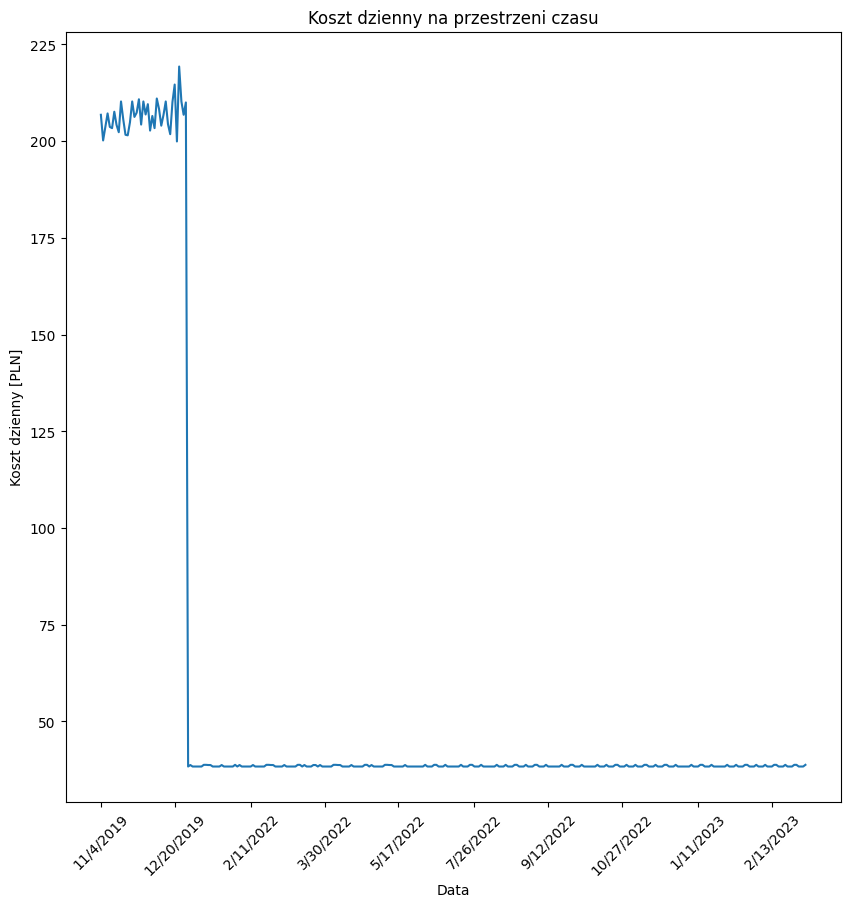

In [51]:
fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.plot(dane['Data'], dane['Koszt dzienny [PLN]'])
axes.set_title('Koszt dzienny na przestrzeni czasu')
axes.set_ylabel('Koszt dzienny [PLN]')
axes.set_xlabel('Data')
axes.set_xticks(dane['Data'][1::100])
axes.set_xticklabels(dane['Data'][1::100], rotation=45)

Powyższy wykres przedstawia koszt dzienny [PLN] dla poszczególnych dat. Początkowy, wysoki koszt jest generowany przez używane wówczas zasilanie Dieslem. Spory spadek kosztów dziennych nastąpił po zmianie układu zasilania na elektryczny.

In [87]:
#Podział zbioru danych na  dotyczące zasilania elektrycznego oraz napędzanego Dieslem. 
dane_Diesel = dane[:117]
dane_Diesel.head(20)


,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
0,1,11/4/2019,5,13.2,2,8,15.0,48.0,4308.413793,0.0,0.0,0.0,206.803862,10.25,2.85,10.25,995.00
1,2,11/4/2019,8,13.2,2,8,15.0,48.0,4308.413793,0.0,0.0,0.0,206.803862,10.25,2.85,10.25,995.00
2,3,11/4/2019,15,13.2,2,8,15.0,48.0,4308.413793,0.0,0.0,0.0,206.803862,10.25,2.85,10.25,995.00
3,4,11/5/2019,5,13.2,1,10,14.9,47.2,4241.000000,0.0,0.0,0.0,200.175200,7.00,1.94,8.00,999.50
4,5,11/5/2019,8,13.2,1,10,14.9,47.2,4241.000000,0.0,0.0,0.0,200.175200,7.00,1.94,8.00,999.50
5,6,11/5/2019,15,13.2,1,10,14.9,47.2,4241.000000,0.0,0.0,0.0,200.175200,7.00,1.94,8.00,999.50
6,7,11/6/2019,5,17.7,3,9,15.1,48.0,4244.000000,0.0,0.0,0.0,203.712000,13.66,3.79,6.75,1004.25
7,8,11/6/2019,8,17.7,3,9,15.1,48.0,4244.000000,0.0,0.0,0.0,203.712000,13.66,3.79,6.75,1004.25
8,9,11/6/2019,15,17.7,3,9,15.1,48.0,4244.000000,0.0,0.0,0.0,203.712000,13.66,3.79,6.75,1004.25
9,10,11/7/2019,5,17.7,8,11,15.2,48.8,4245.000000,0.0,0.0,0.0,207.156000,6.50,1.81,6.00,1008.50


In [88]:
dane_Electric = dane[118:]
dane_Electric.head(20)

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
118,119,1/3/2022,8,13.2,2,3,0.0,0.0,4308.413793,39.6,79.2,0.4843,38.35656,34.00,9.44,8.5,1009.50
119,120,1/3/2022,15,13.2,1,3,0.0,0.0,4308.413793,39.6,79.2,0.4843,38.35656,34.00,9.44,8.5,1009.50
120,121,1/4/2022,5,13.2,1,10,0.0,0.0,4308.413793,39.8,80.0,0.4843,38.74400,37.50,10.42,8.5,1000.25
121,122,1/4/2022,8,13.2,1,10,0.0,0.0,4308.413793,39.8,80.0,0.4843,38.74400,37.50,10.42,8.5,1000.25
122,123,1/4/2022,15,13.2,3,10,0.0,0.0,4308.413793,39.8,80.0,0.4843,38.74400,37.50,10.42,8.5,1000.25
123,124,1/5/2022,5,17.7,3,4,0.0,0.0,4308.413793,39.7,79.2,0.4843,38.35656,24.25,6.74,4.0,1000.50
124,125,1/5/2022,8,17.7,3,4,0.0,0.0,4308.413793,39.7,79.2,0.4843,38.35656,24.25,6.74,4.0,1000.50
125,126,1/5/2022,15,17.7,8,4,0.0,0.0,4308.413793,39.7,79.2,0.4843,38.35656,24.25,6.74,4.0,1000.50
126,127,1/7/2022,5,17.7,8,14,0.0,0.0,4308.413793,39.6,79.2,0.4843,38.35656,14.25,3.96,0.0,1021.50
127,128,1/7/2022,8,17.7,8,14,0.0,0.0,4308.413793,39.6,79.2,0.4843,38.35656,14.25,3.96,0.0,1021.50


Obliczenie średnich kosztów dziennych związanych z typem zasilania dźwignicy

In [76]:
dane_Diesel_mean = dane_Diesel['Koszt dzienny [PLN]'].mean()
print("Średni koszt dzienny zasilania silnikiem spalinowym: " , dane_Diesel_mean)
dane_Electric_mean = dane_Electric['Koszt dzienny [PLN]'].mean()
print("Średni koszt dzienny zasilania silnikiem elektrycznym: " , dane_Electric_mean)


Średni koszt dzienny zasilania silnikiem spalinowym:  206.62940901856766
Średni koszt dzienny zasilania silnikiem elektrycznym:  38.4806691686747


                          Ciężar ładunku [T]  Wysokość podnoszenia [m]  \
Ciężar ładunku [T]                  1.000000                 -0.540189   
Wysokość podnoszenia [m]           -0.540189                  1.000000   
Odległość od osi [m]               -0.129913                 -0.073780   
Koszt dzienny [PLN]                -0.172276                 -0.044532   

                          Odległość od osi [m]  Koszt dzienny [PLN]  
Ciężar ładunku [T]                   -0.129913            -0.172276  
Wysokość podnoszenia [m]             -0.073780            -0.044532  
Odległość od osi [m]                  1.000000             0.198972  
Koszt dzienny [PLN]                   0.198972             1.000000  


<Axes: >

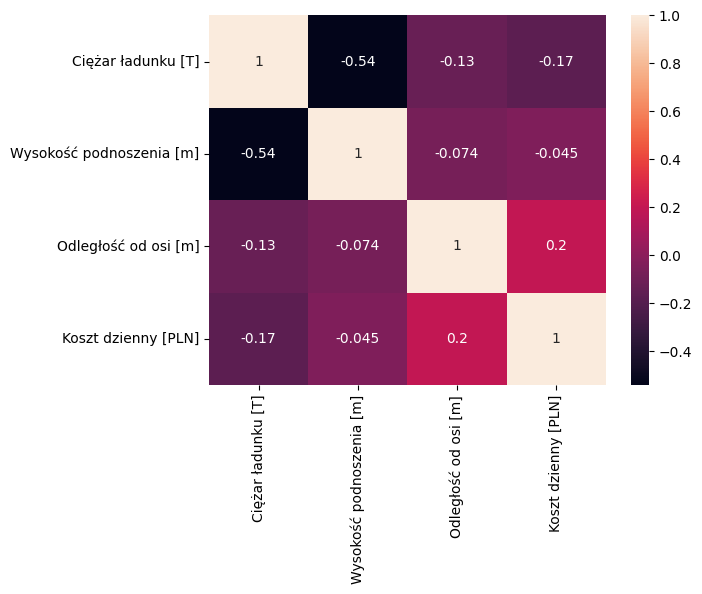

In [83]:
#Wyznaczenie korelacji pomiędzy zmiennymi 'Ciężar ładunku [T]', 'Wysokość podnoszenia [m]', 'Odległość od osi [m]', 'Koszt dzienny [PLN] dla silnika Diesla'
zaleznosc = dane_Diesel[['Ciężar ładunku [T]', 'Wysokość podnoszenia [m]', 'Odległość od osi [m]', 'Koszt dzienny [PLN]' ]]
corr_matrix_Diesel = zaleznosc.corr()
print(corr_matrix_Diesel)

sns.heatmap(corr_matrix_Diesel, annot=True)

                          Ciężar ładunku [T]  Wysokość podnoszenia [m]  \
Ciężar ładunku [T]                  1.000000                 -0.486052   
Wysokość podnoszenia [m]           -0.486052                  1.000000   
Odległość od osi [m]               -0.121694                  0.043963   
Koszt dzienny [PLN]                 0.032299                  0.009679   

                          Odległość od osi [m]  Koszt dzienny [PLN]  
Ciężar ładunku [T]                   -0.121694             0.032299  
Wysokość podnoszenia [m]              0.043963             0.009679  
Odległość od osi [m]                  1.000000            -0.042908  
Koszt dzienny [PLN]                  -0.042908             1.000000  


<Axes: >

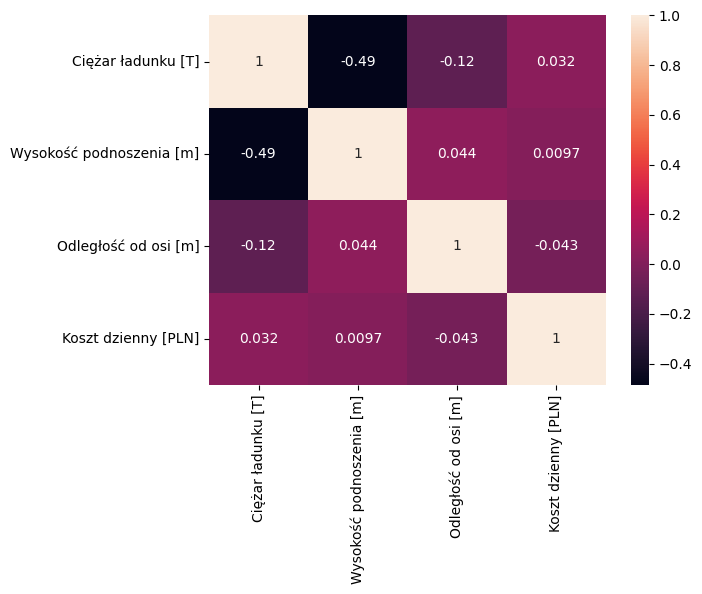

In [86]:
#Wyznaczenie korelacji pomiędzy zmiennymi 'Ciężar ładunku [T]', 'Wysokość podnoszenia [m]', 'Odległość od osi [m]', 'Koszt dzienny [PLN] dla silnika elektrycznego'
zaleznosc = dane_Electric[['Ciężar ładunku [T]', 'Wysokość podnoszenia [m]', 'Odległość od osi [m]', 'Koszt dzienny [PLN]' ]]
corr_matrix_Electric = zaleznosc.corr()
print(corr_matrix_Electric)

sns.heatmap(corr_matrix_Electric, annot=True)

5. Wybór kolumny, która może być dobrą zmienną użytą do tworzenia modelu ML jako zmienna TARGET.

> Jako zmienną TARGET należałoby wybrać zmienną 'Koszt dzienny [PLN]', ponieważ pozwala ona na zoptymalizowanie kosztów jakie ponosi firma zajmująca się dźwignicami żurawia.

6. Wybór podzbiór zmiennych FEATURES, które mogą zostać użyte do wyznaczenia zmiennej TARGET. 

> Jako podzbiór zmiennych FEATURES, należałoby wybrać kolumny od których jest zależny koszt dzienny oraz zużycie energii czyli 'Ciężar ładunku [T]', 'Wysokość podnoszenia [m]', 'Odległość od osi [m]'.

Bibliografia:


*   https://seaborn.pydata.org
*   https://www.techtarget.com/searchapparchitecture/tip/What-are-the-types-of-APIs-and-their-differences
*   lab3, lab4
* wykłady
*   chat.openai.com/



